<a href="https://colab.research.google.com/github/elghazaliichraq8479encg-ops/DS/blob/main/Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iabhishekofficial/mobile-price-classification",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1309528723.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 120k/120k [00:00<00:00, 1.50MB/s]

First 5 records:    battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_scr

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
# The 'df' variable from the first cell already contains the data from 'train.csv'.
train_df = df

# Load the test dataset using kagglehub, similar to how train.csv was loaded.
test_file_path = "test.csv"
test_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iabhishekofficial/mobile-price-classification",
  test_file_path,
)

print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)
print("\nTrain dataset info:")
print(train_df.info())

Using Colab cache for faster access to the 'mobile-price-classification' dataset.
Train dataset shape: (2000, 21)
Test dataset shape: (1000, 21)

Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           200

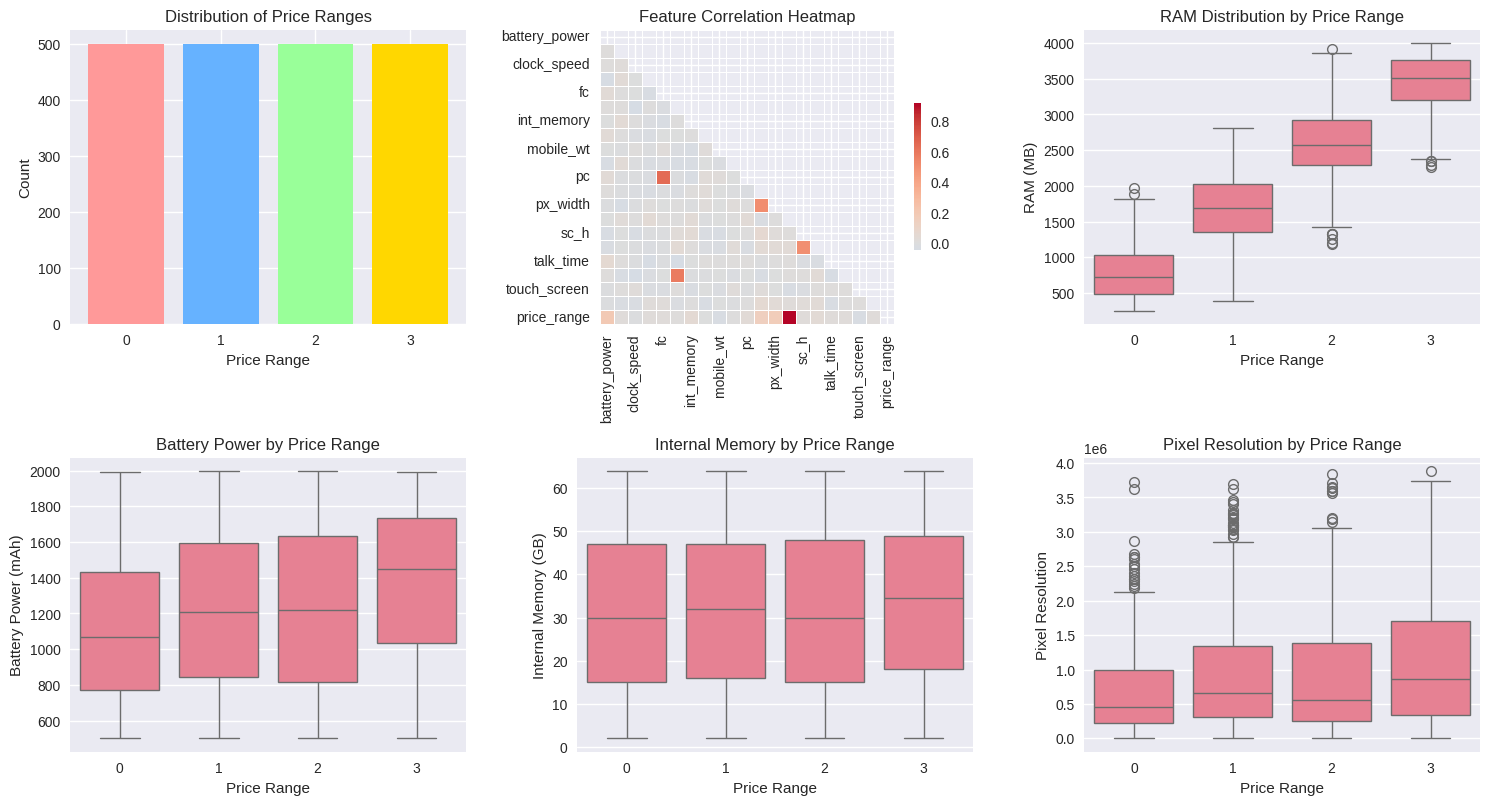

In [ ]:
plt.figure(figsize=(15, 12))

# Price range distribution
plt.subplot(3, 3, 1)
price_counts = train_df['price_range'].value_counts().sort_index()
plt.bar(price_counts.index, price_counts.values, color=['#FF9999', '#66B2FF', '#99FF99', '#FFD700'])
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Price Ranges')
plt.xticks([0, 1, 2, 3])

# 2. Correlation Heatmap
plt.subplot(3, 3, 2)
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
correlation_matrix = train_df[numeric_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Feature Correlation Heatmap')

# 3. RAM vs Price Range
plt.subplot(3, 3, 3)
sns.boxplot(x='price_range', y='ram', data=train_df)
plt.title('RAM Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM (MB)')

# 4. Battery Power vs Price Range
plt.subplot(3, 3, 4)
sns.boxplot(x='price_range', y='battery_power', data=train_df)
plt.title('Battery Power by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power (mAh)')
# 5. Internal Memory vs Price Range
plt.subplot(3, 3, 5)
sns.boxplot(x='price_range', y='int_memory', data=train_df)
plt.title('Internal Memory by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Internal Memory (GB)')

# 6. Pixel Resolution (Width x Height)
plt.subplot(3, 3, 6)
# Create a resolution feature
train_df['pixel_resolution'] = train_df['px_width'] * train_df['px_height']
sns.boxplot(x='price_range', y='pixel_resolution', data=train_df)
plt.title('Pixel Resolution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Pixel Resolution')
plt.tight_layout()
plt.show()

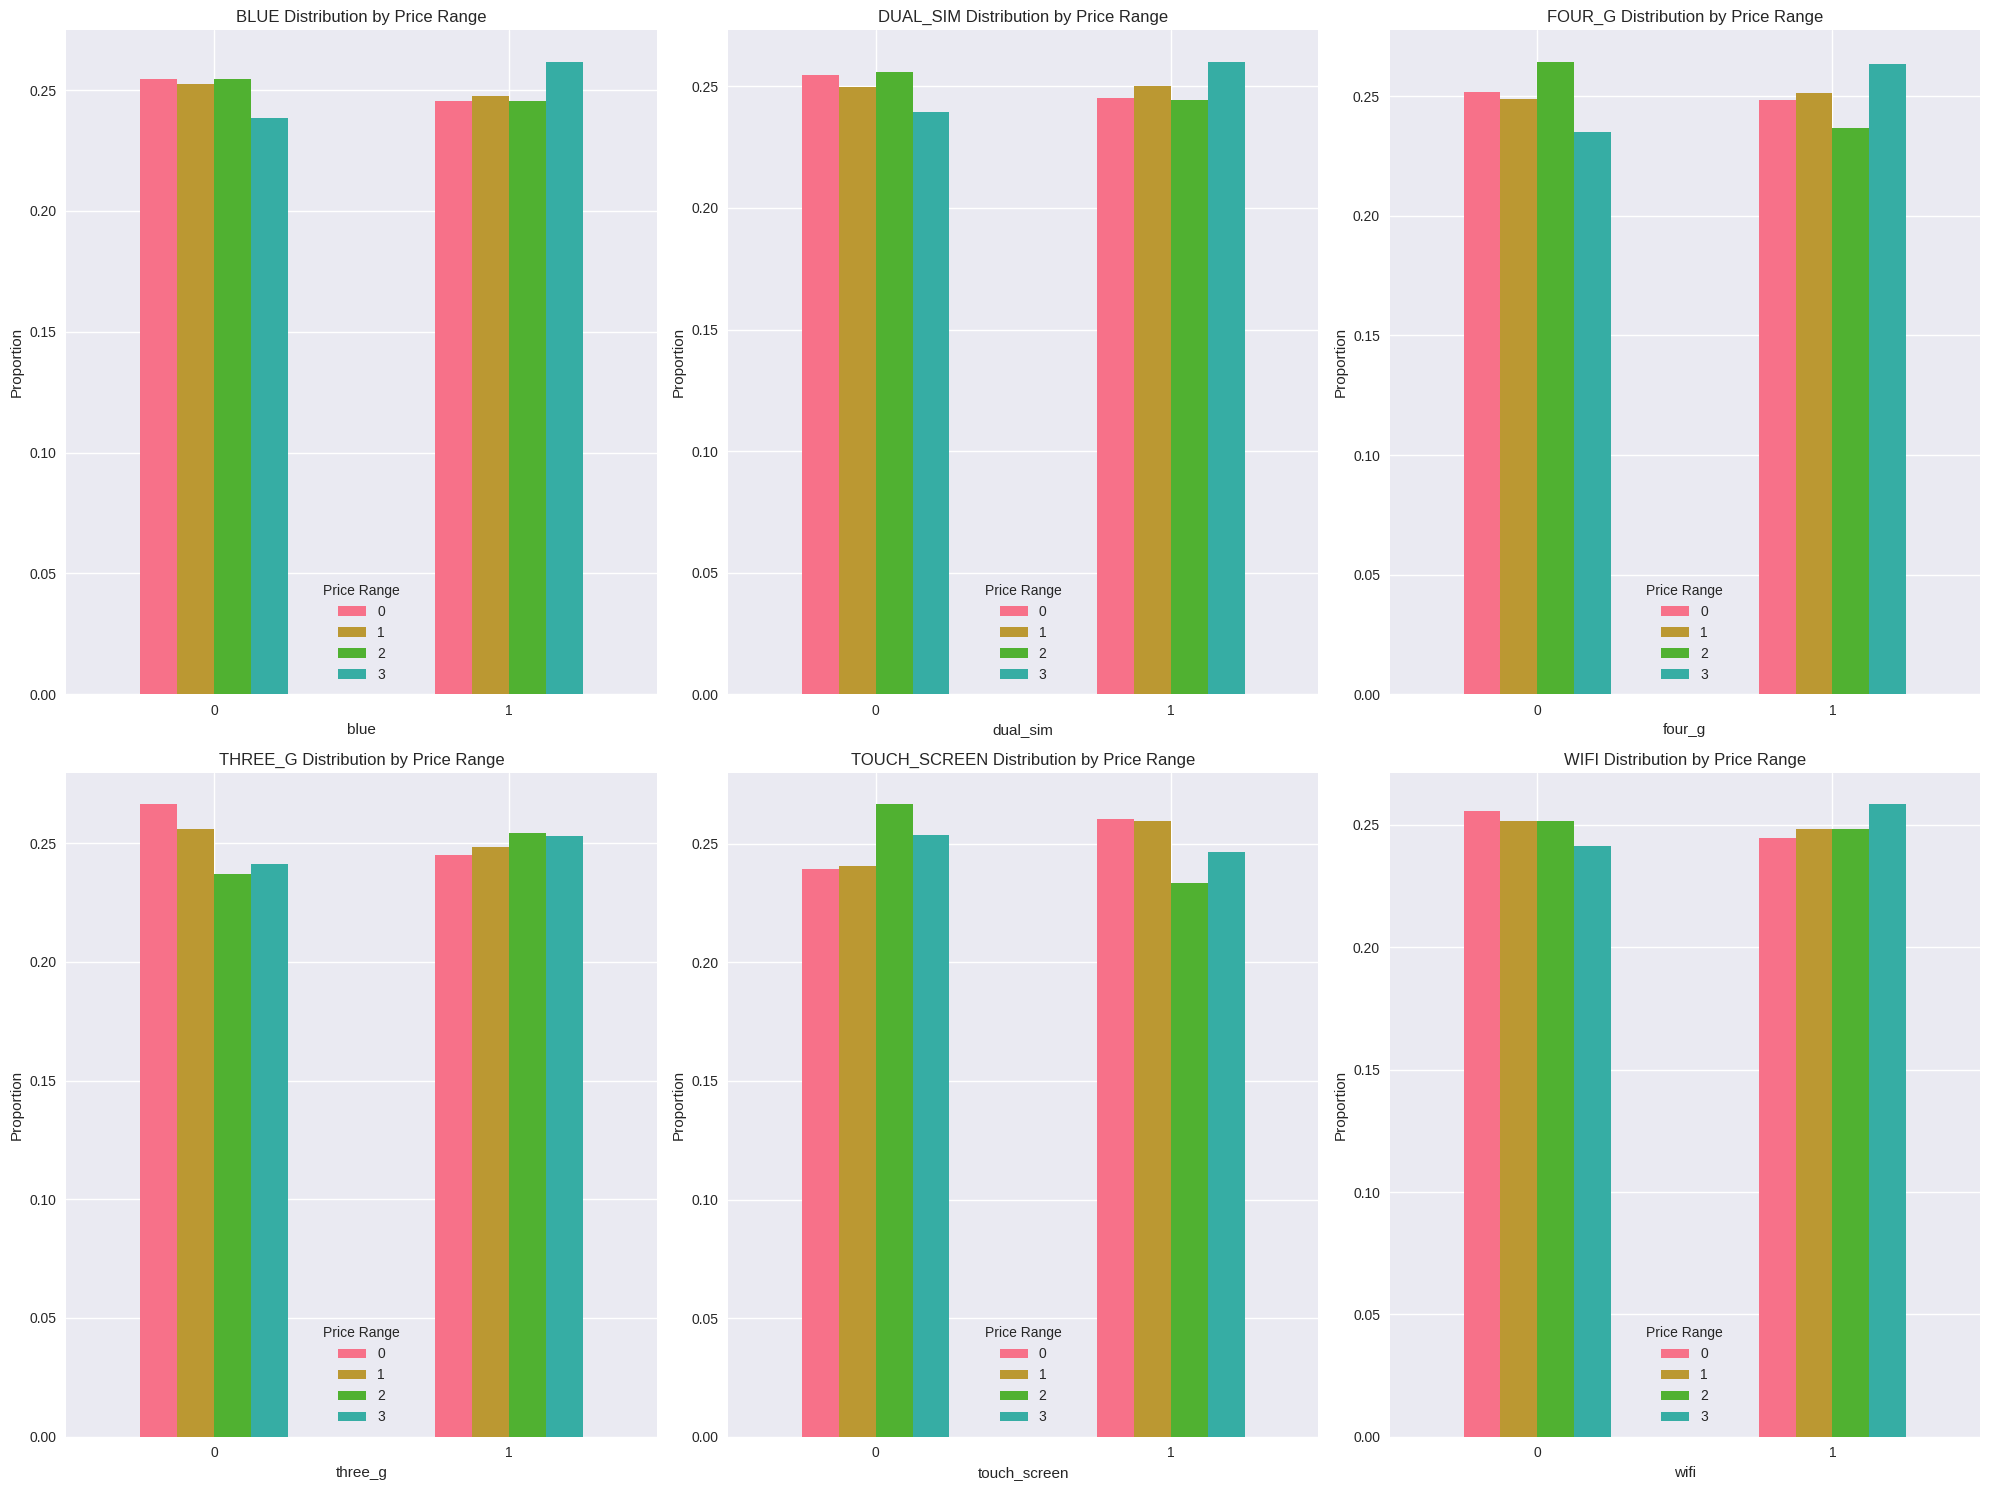

In [ ]:
# Categorical Features Analysis
plt.figure(figsize=(20, 15))

# List of categorical features (binary)
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    cross_tab = pd.crosstab(train_df[feature], train_df['price_range'])
    cross_tab_perc = cross_tab.div(cross_tab.sum(1), axis=0)
    cross_tab_perc.plot(kind='bar', ax=plt.gca())
    plt.title(f'{feature.upper()} Distribution by Price Range')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.legend(title='Price Range')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

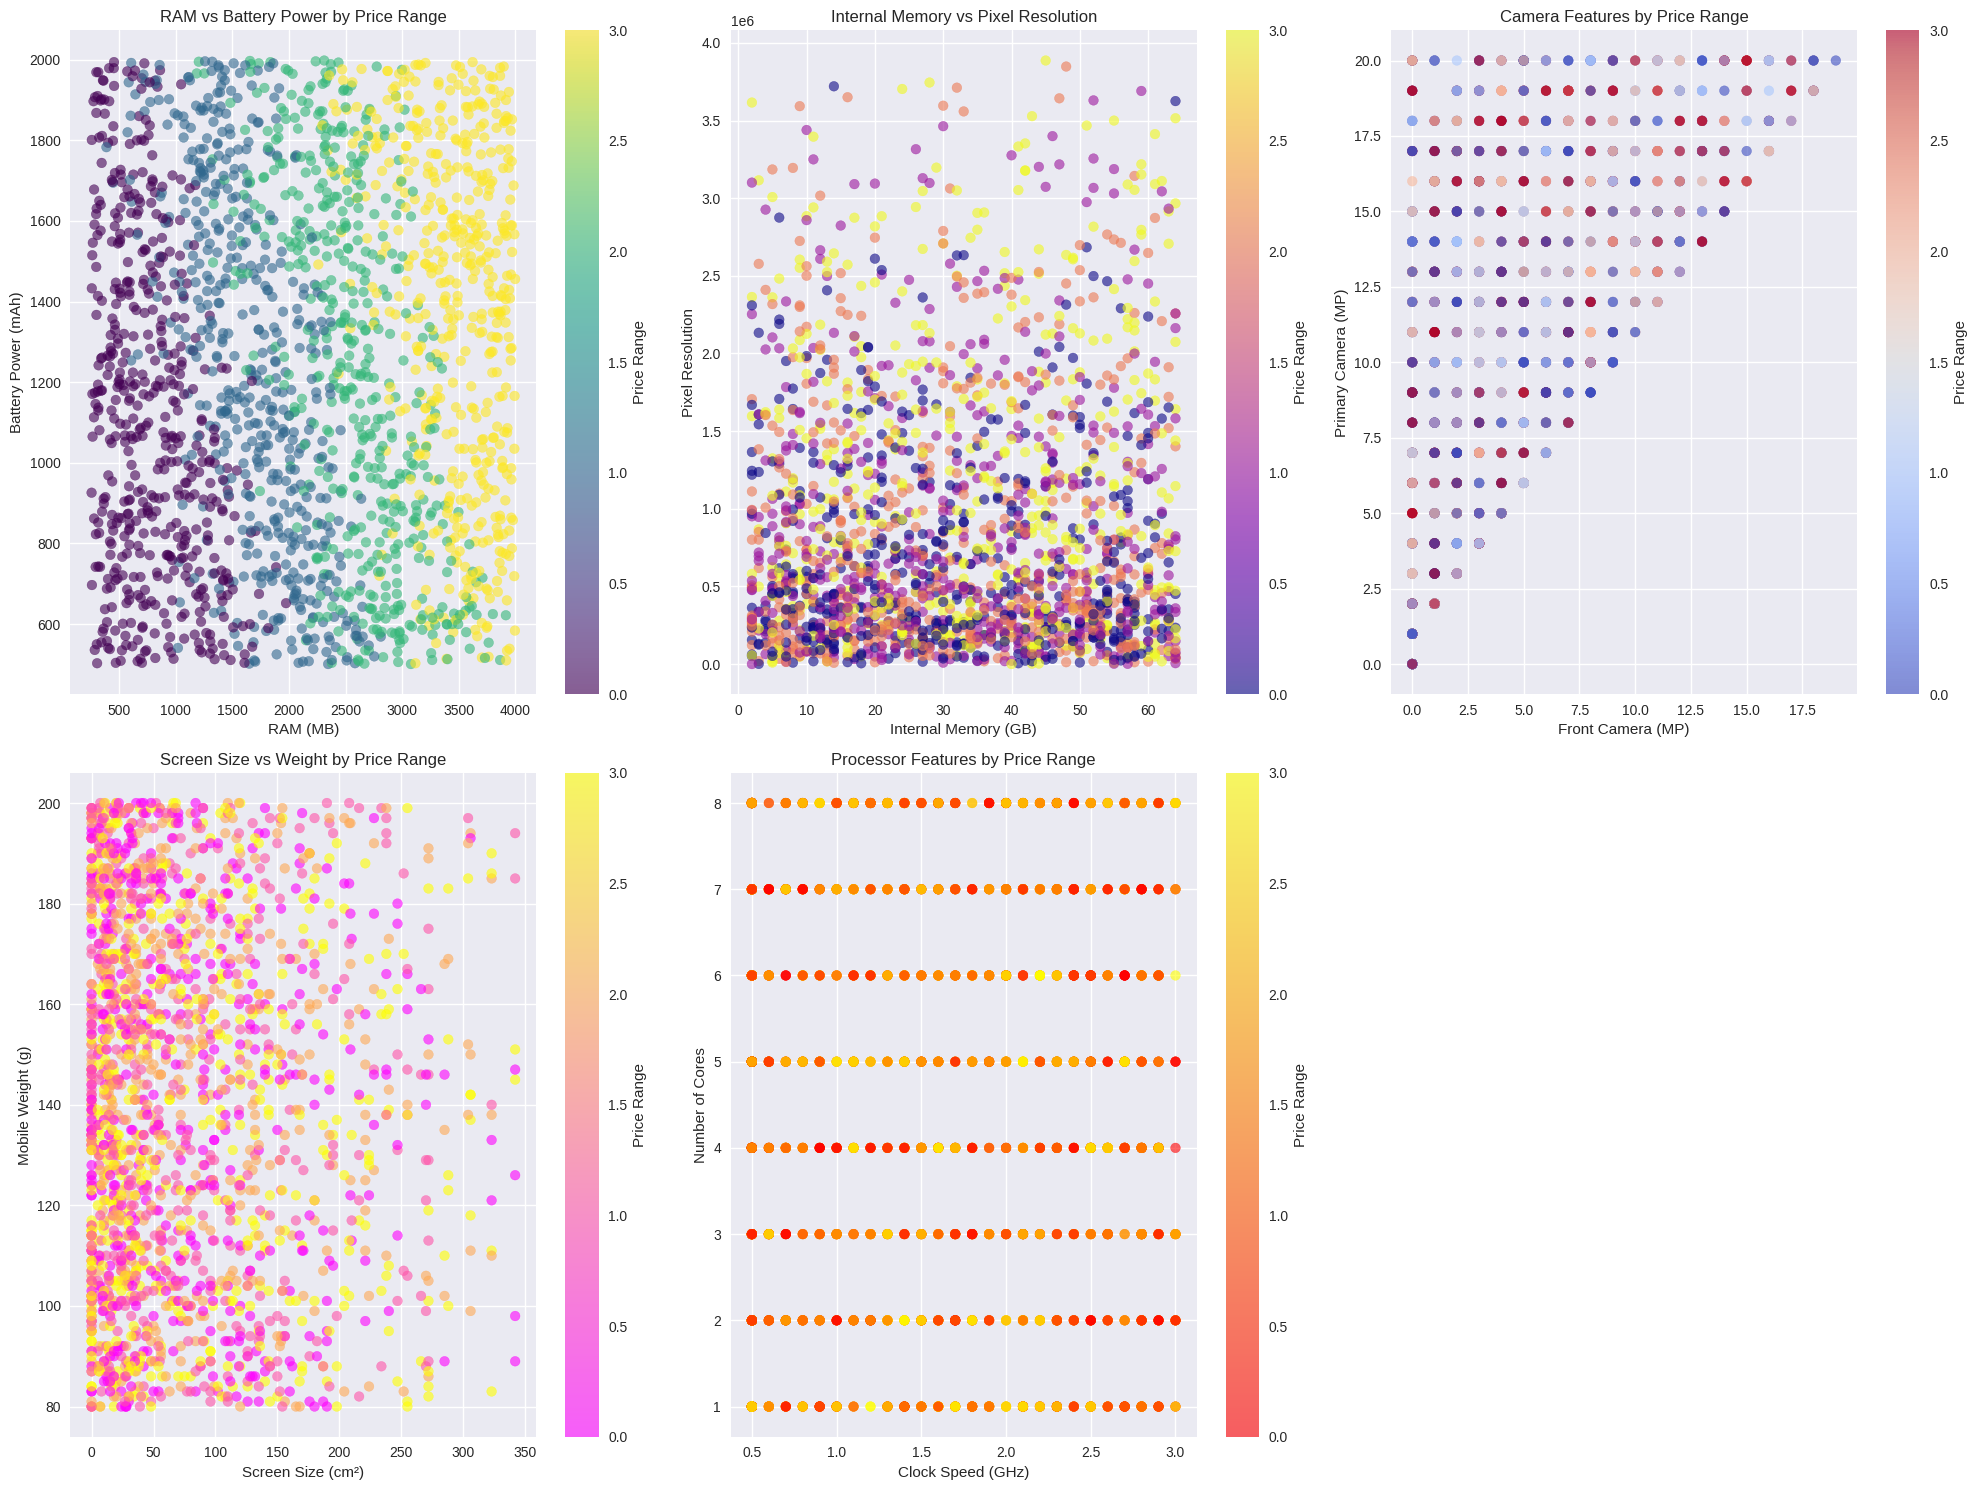

In [ ]:
# Scatter plots for key features
plt.figure(figsize=(20, 15))

# 1. RAM vs Battery Power colored by price range
plt.subplot(2, 3, 1)
scatter = plt.scatter(train_df['ram'], train_df['battery_power'],
                     c=train_df['price_range'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Price Range')
plt.xlabel('RAM (MB)')
plt.ylabel('Battery Power (mAh)')
plt.title('RAM vs Battery Power by Price Range')
# 2. Internal Memory vs Pixel Resolution
plt.subplot(2, 3, 2)
scatter = plt.scatter(train_df['int_memory'], train_df['pixel_resolution'],
                     c=train_df['price_range'], cmap='plasma', alpha=0.6)
plt.colorbar(scatter, label='Price Range')
plt.xlabel('Internal Memory (GB)')
plt.ylabel('Pixel Resolution')
plt.title('Internal Memory vs Pixel Resolution')

# 3. Camera Features (Front Camera vs Primary Camera)
plt.subplot(2, 3, 3)
scatter = plt.scatter(train_df['fc'], train_df['pc'],
                     c=train_df['price_range'], cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Price Range')
plt.xlabel('Front Camera (MP)')
plt.ylabel('Primary Camera (MP)')
plt.title('Camera Features by Price Range')

# 4. Screen Size vs Mobile Weight
plt.subplot(2, 3, 4)
train_df['screen_size'] = train_df['sc_h'] * train_df['sc_w']
scatter = plt.scatter(train_df['screen_size'], train_df['mobile_wt'],
                     c=train_df['price_range'], cmap='spring', alpha=0.6)
plt.colorbar(scatter, label='Price Range')
plt.xlabel('Screen Size (cm²)')
plt.ylabel('Mobile Weight (g)')
plt.title('Screen Size vs Weight by Price Range')
# 5. Clock Speed vs Number of Cores
plt.subplot(2, 3, 5)
scatter = plt.scatter(train_df['clock_speed'], train_df['n_cores'],
                     c=train_df['price_range'], cmap='autumn', alpha=0.6)
plt.colorbar(scatter, label='Price Range')
plt.xlabel('Clock Speed (GHz)')
plt.ylabel('Number of Cores')
plt.title('Processor Features by Price Range')

plt.tight_layout()
plt.show()

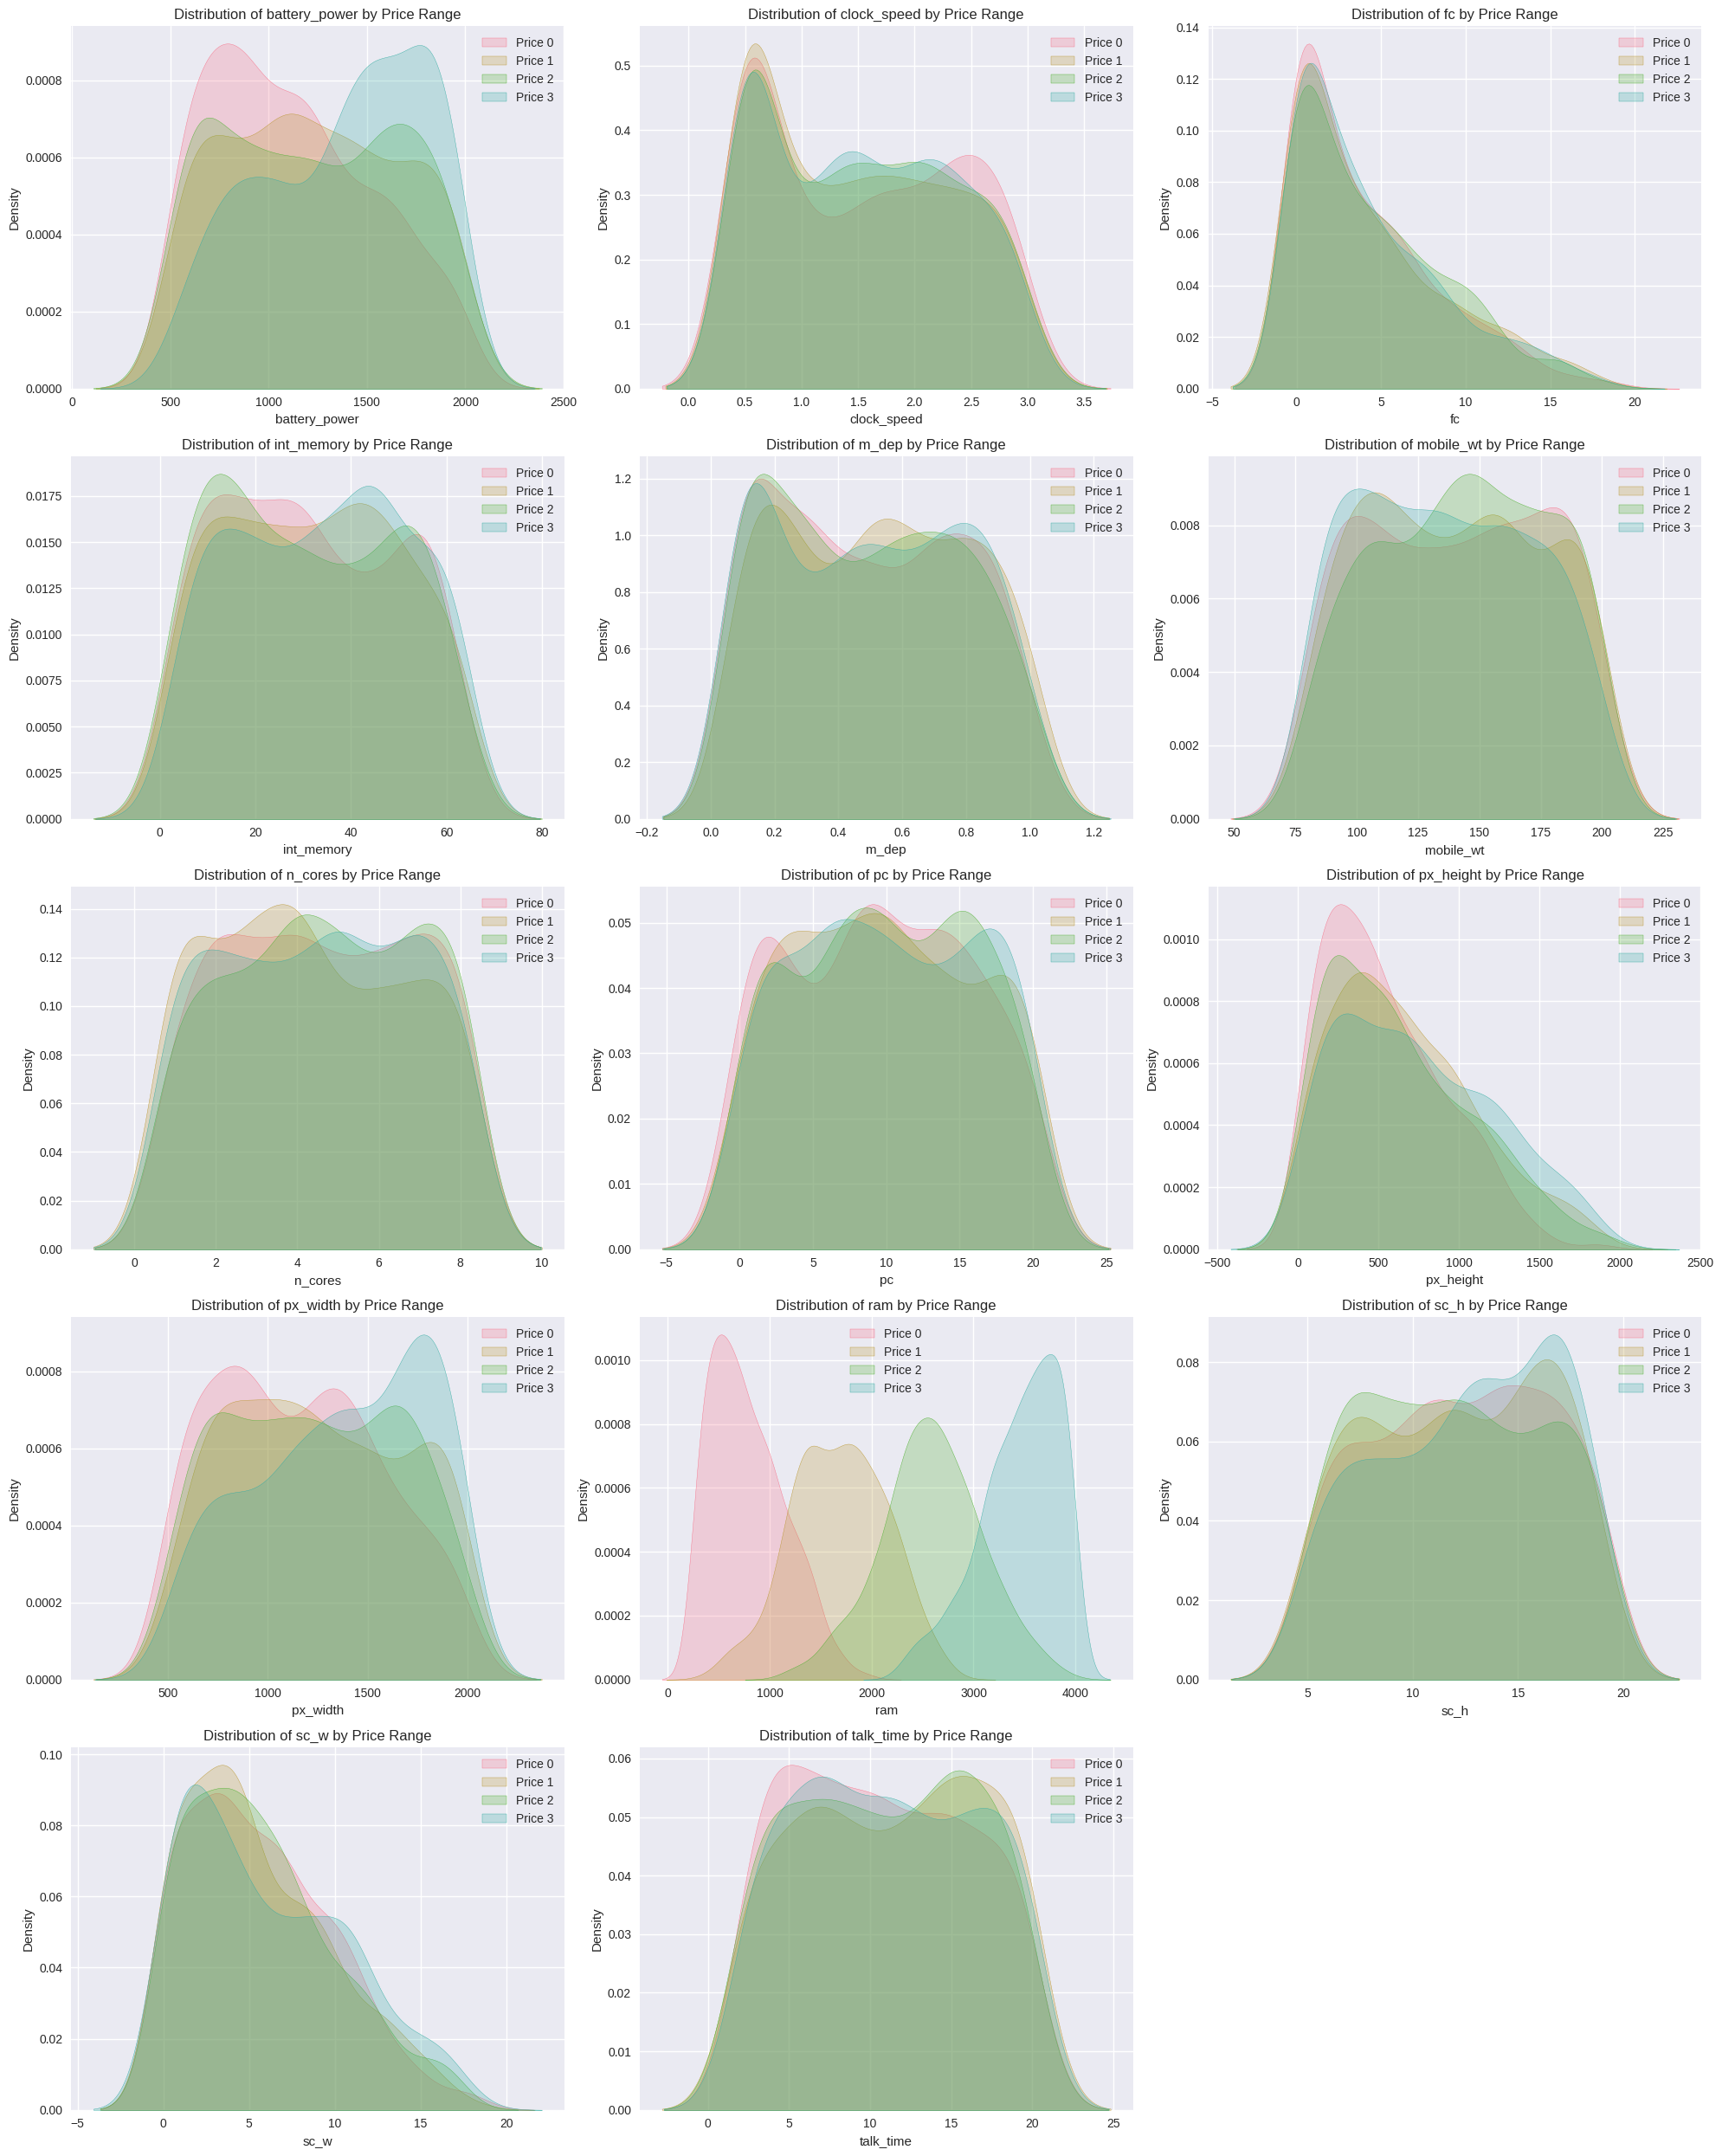

In [ ]:
# Distribution of all numerical features
numerical_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                     'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
                     'sc_h', 'sc_w', 'talk_time']

plt.figure(figsize=(20, 25))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)

    # Plot distribution for each price range
    for price_range in sorted(train_df['price_range'].unique()):
        subset = train_df[train_df['price_range'] == price_range]
        sns.kdeplot(subset[feature], label=f'Price {price_range}', fill=True)
    plt.title(f'Distribution of {feature} by Price Range')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


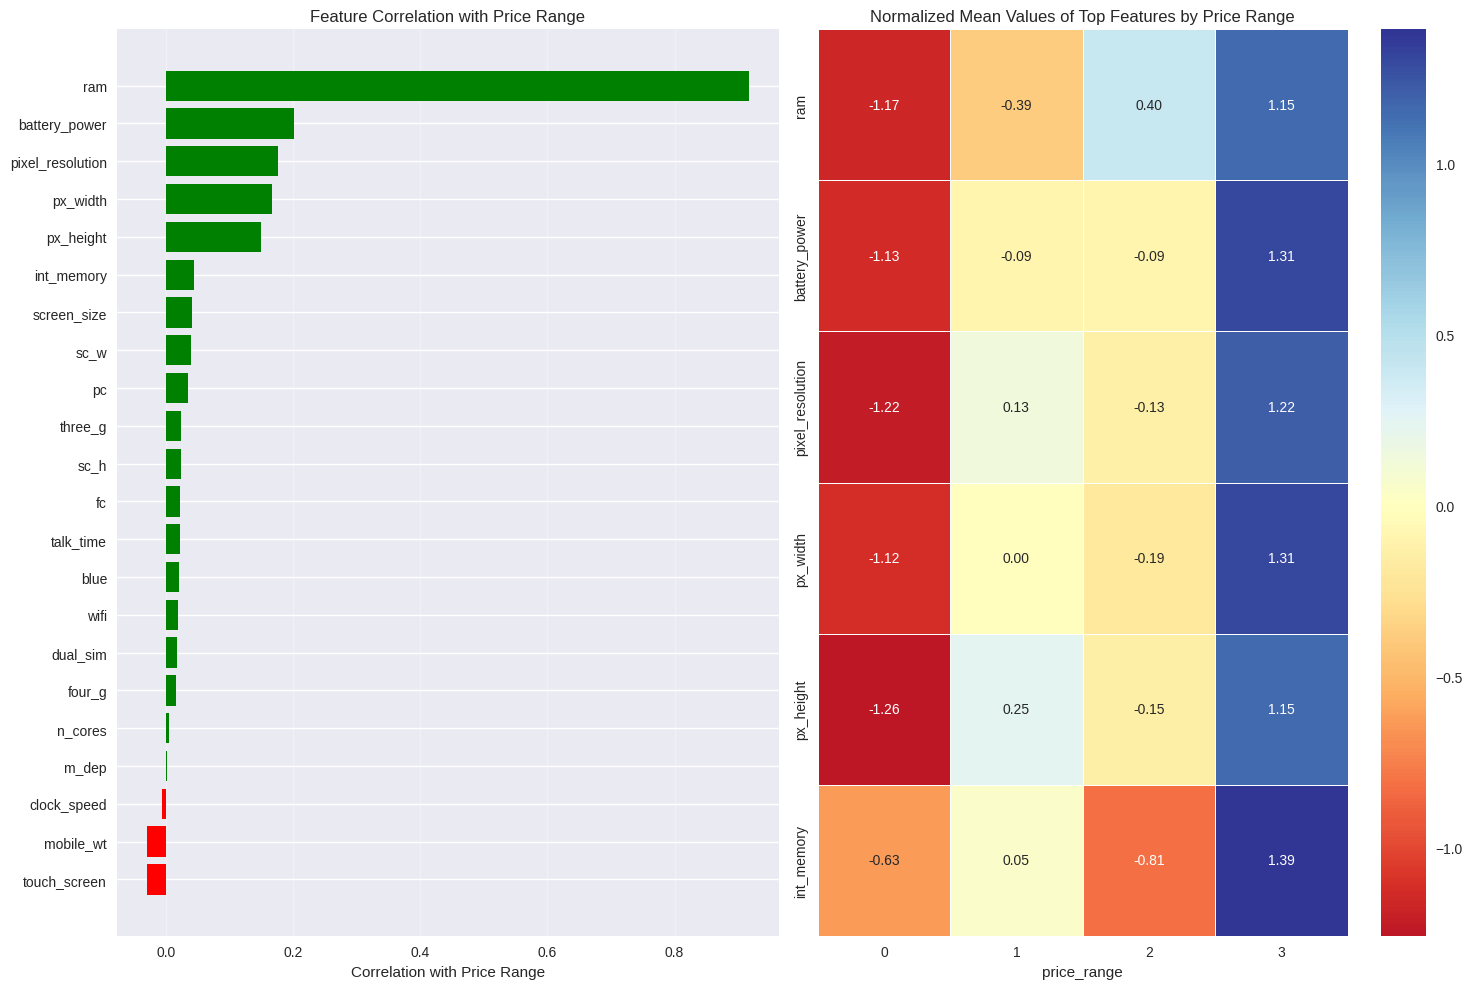

In [ ]:
# Feature importance based on correlation with price range
plt.figure(figsize=(15, 10))

# Calculate correlation with price range
correlation_with_price = train_df.corr()['price_range'].drop('price_range').sort_values(ascending=True)

plt.subplot(1, 2, 1)
colors = ['red' if x < 0 else 'green' for x in correlation_with_price.values]
plt.barh(range(len(correlation_with_price)), correlation_with_price.values, color=colors)
plt.yticks(range(len(correlation_with_price)), correlation_with_price.index)
plt.xlabel('Correlation with Price Range')
plt.title('Feature Correlation with Price Range')
plt.grid(axis='x', alpha=0.3)

# Mean values by price range for top features
plt.subplot(1, 2, 2)
top_features = correlation_with_price.abs().nlargest(6).index
feature_means = train_df.groupby('price_range')[top_features].mean()

# Normalize for better visualization
normalized_means = (feature_means - feature_means.mean()) / feature_means.std()

sns.heatmap(normalized_means.T, annot=True, cmap='RdYlBu', center=0,
            fmt='.2f', linewidths=0.5)
plt.title('Normalized Mean Values of Top Features by Price Range')
plt.tight_layout()
plt.show()

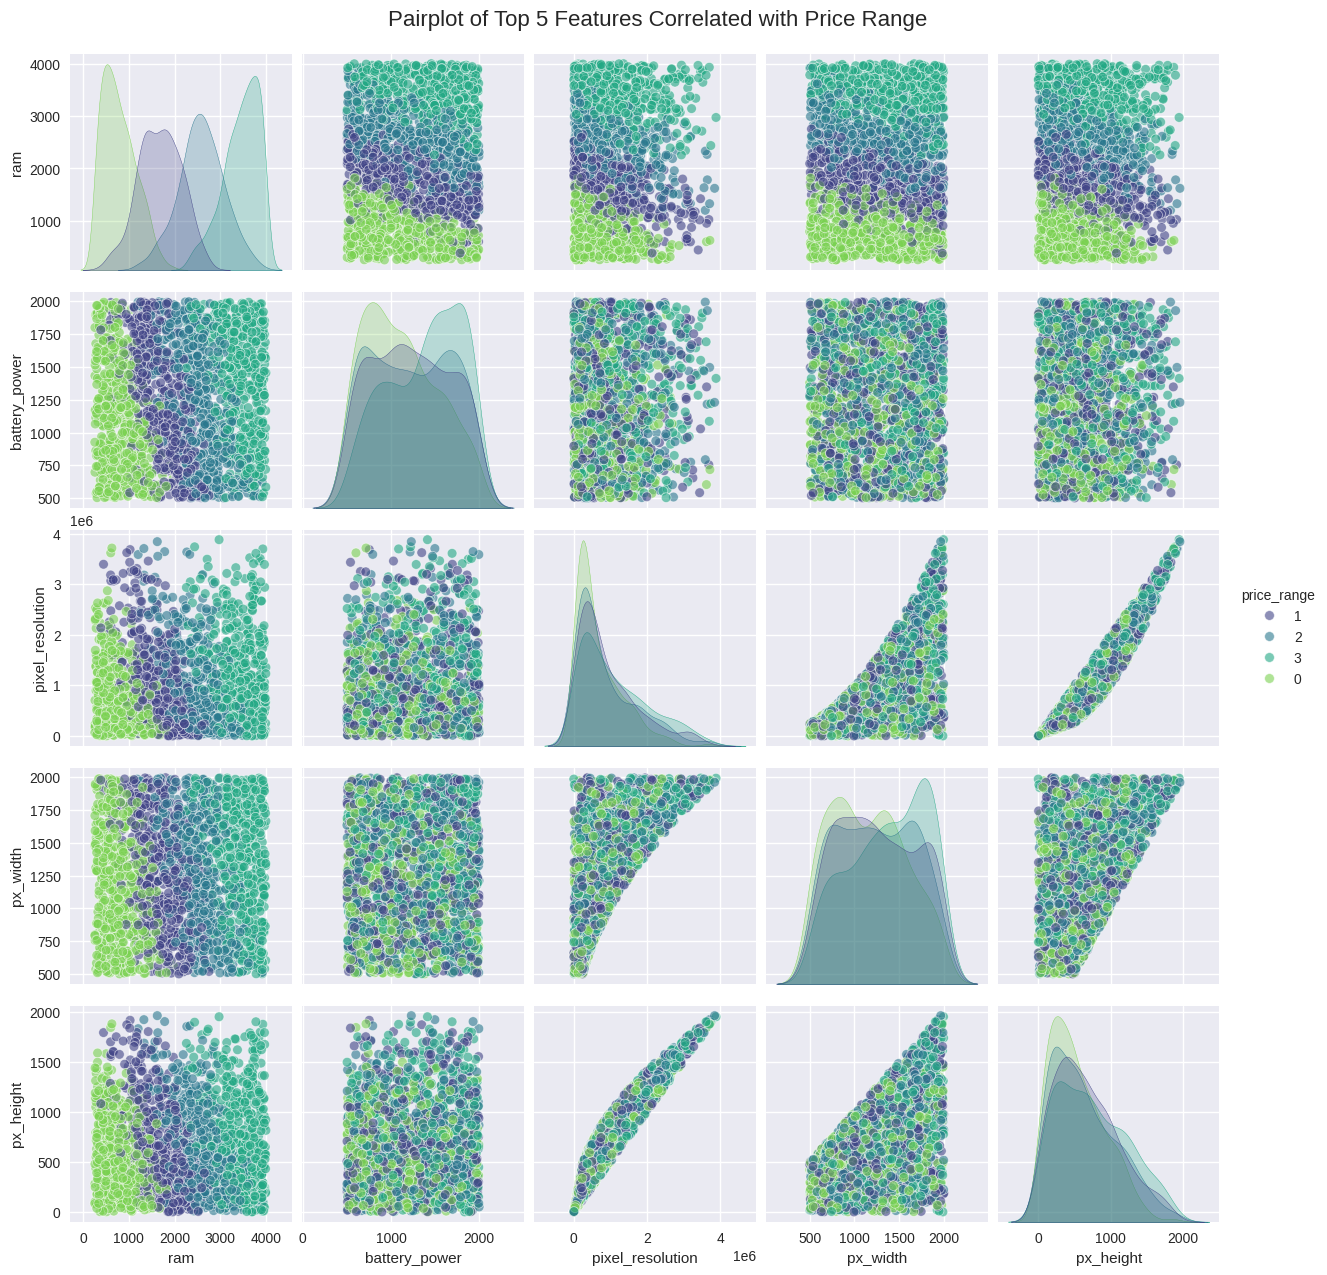

In [ ]:
# Pairplot for top correlated features
top_5_features = correlation_with_price.abs().nlargest(5).index.tolist()

# Create pairplot
pairplot_df = train_df[top_5_features + ['price_range']].copy()
pairplot_df['price_range'] = pairplot_df['price_range'].astype(str)

g = sns.pairplot(pairplot_df, hue='price_range', palette='viridis',
                 diag_kind='kde', plot_kws={'alpha': 0.6})
g.fig.suptitle('Pairplot of Top 5 Features Correlated with Price Range',
               y=1.02, fontsize=16)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def create_features(df):
    df = df.copy()

    # Create new features
    df['pixel_density'] = df['px_width'] * df['px_height']
    df['screen_area'] = df['sc_h'] * df['sc_w']
    df['total_camera_mp'] = df['pc'] + df['fc']
    df['battery_to_weight'] = df['battery_power'] / df['mobile_wt']
    df['memory_to_cores'] = df['int_memory'] / (df['n_cores'] + 1)  # +1 to avoid division by zero

    # Replace any infinities with NaN and then fill with median
    df = df.replace([np.inf, -np.inf], np.nan)

    return df

In [ ]:
print("Applying feature engineering...")
train_df_enhanced = create_features(train_df)
test_df_enhanced = create_features(test_df)

print(f"Enhanced train shape: {train_df_enhanced.shape}")
print(f"Enhanced test shape: {test_df_enhanced.shape}")


Applying feature engineering...
Enhanced train shape: (2000, 28)
Enhanced test shape: (1000, 26)


In [ ]:
test_df_enhanced['pixel_resolution'] = test_df_enhanced['px_width'] * test_df_enhanced['px_height']
test_df_enhanced['screen_size'] = test_df_enhanced['sc_h'] * test_df_enhanced['sc_w']

In [ ]:
train_features = [col for col in train_df_enhanced.columns if col != 'price_range']
test_features = test_df_enhanced.columns

print(f"\nTrain features: {len(train_features)}")
print(f"Test features: {len(test_features)}")
print(f"Features match: {set(train_features) == set(test_features)}")


Train features: 27
Test features: 28
Features match: False


In [ ]:
missing_in_test = set(train_features) - set(test_features)
missing_in_train = set(test_features) - set(train_features)

if missing_in_test:
    print(f"Features missing in test: {missing_in_test}")
if missing_in_train:
    print(f"Features missing in train: {missing_in_train}")

Features missing in train: {'id'}


In [ ]:
X = train_df_enhanced.drop('price_range', axis=1)
y = train_df_enhanced['price_range']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (2000, 27)
y shape: (2000,)


In [ ]:
test_df_enhanced = test_df_enhanced[X.columns]

print(f"Final test shape: {test_df_enhanced.shape}")
print(f"Feature alignment confirmed: {all(X.columns == test_df_enhanced.columns)}")

Final test shape: (1000, 27)
Feature alignment confirmed: True


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
test_scaled = scaler.transform(test_df_enhanced)

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

In [ ]:
results = {}
for name, model in models.items():
    if name in ['SVM', 'K-Nearest Neighbors', 'Logistic Regression']:
        # Use scaled data for these models
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        # Use unscaled data for tree-based models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred
    }

    print(f"{name:20} | Test Accuracy: {accuracy:.4f} | CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

Random Forest        | Test Accuracy: 0.9150 | CV Accuracy: 0.8787 (±0.0118)
XGBoost              | Test Accuracy: 0.9325 | CV Accuracy: 0.8950 (±0.0064)
Gradient Boosting    | Test Accuracy: 0.9150 | CV Accuracy: 0.8912 (±0.0182)
SVM                  | Test Accuracy: 0.9150 | CV Accuracy: 0.8412 (±0.0170)
Logistic Regression  | Test Accuracy: 0.9150 | CV Accuracy: 0.9481 (±0.0121)
K-Nearest Neighbors  | Test Accuracy: 0.9150 | CV Accuracy: 0.4700 (±0.0177)
Decision Tree        | Test Accuracy: 0.8675 | CV Accuracy: 0.8206 (±0.0249)
Naive Bayes          | Test Accuracy: 0.8275 | CV Accuracy: 0.7937 (±0.0240)


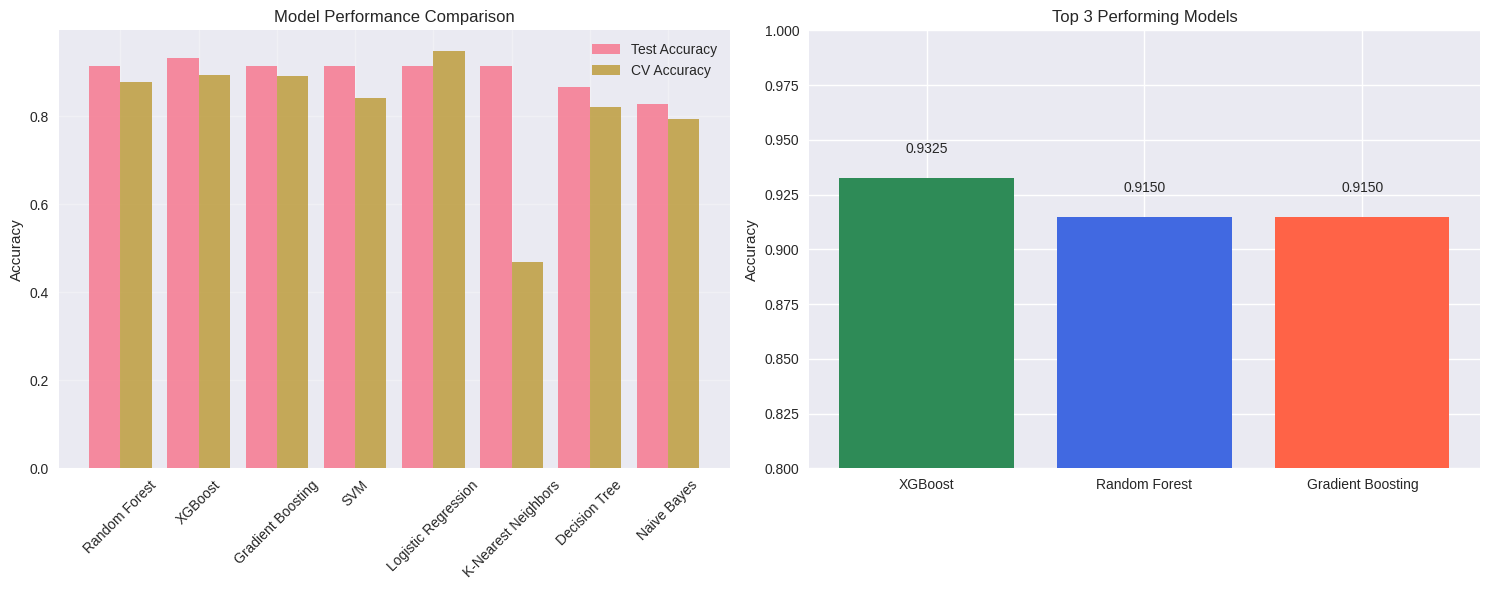

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot model comparison
plt.figure(figsize=(15, 6))

# Test accuracy comparison
plt.subplot(1, 2, 1)
model_names = list(results.keys())
test_accuracies = [results[name]['accuracy'] for name in model_names]
cv_accuracies = [results[name]['cv_mean'] for name in model_names]
x_pos = np.arange(len(model_names))
plt.bar(x_pos - 0.2, test_accuracies, 0.4, label='Test Accuracy', alpha=0.8)
plt.bar(x_pos + 0.2, cv_accuracies, 0.4, label='CV Accuracy', alpha=0.8)
plt.xticks(x_pos, model_names, rotation=45)
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Detailed metrics for top 3 models
plt.subplot(1, 2, 2)
top_models = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)[:3]
top_model_names = [name for name, _ in top_models]
top_model_accuracies = [results[name]['accuracy'] for name in top_model_names]
plt.bar(top_model_names, top_model_accuracies, color=['#2E8B57', '#4169E1', '#FF6347'])
plt.ylabel('Accuracy')
plt.title('Top 3 Performing Models')
plt.ylim(0.8, 1.0)
for i, v in enumerate(top_model_accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7985
           1       0.64      0.33      0.43      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043


Accuracy Score: 0.8992590954329316


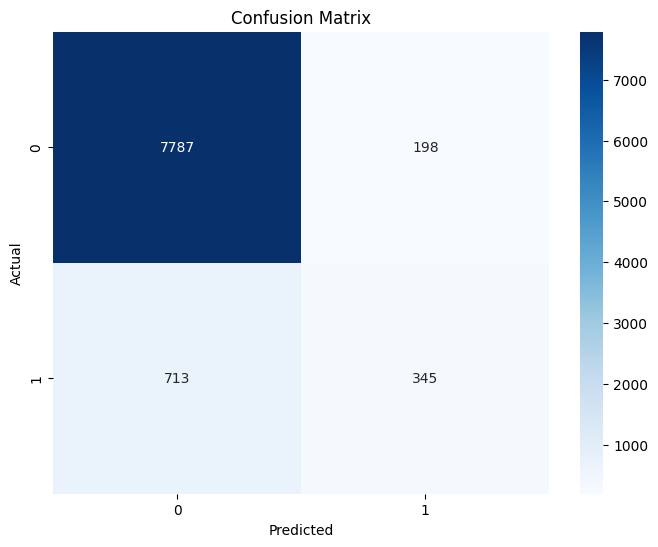

In [16]:
# ---------------------------------------------------------
# Install ucimlrepo if not already installed
# ---------------------------------------------------------
!pip install ucimlrepo

# ---------------------------------------------------------
# 1. Charger le dataset
# ---------------------------------------------------------
from ucimlrepo import fetch_ucirepo
import pandas as pd

bank_marketing = fetch_ucirepo(id=222)

# Features et Target
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Transformer la target yes/no en 1/0
y = y.apply(lambda col: col.map({"yes": 1, "no": 0}))

# ---------------------------------------------------------
# Preprocessing: Handle Categorical Features
# ---------------------------------------------------------
# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# ---------------------------------------------------------
# 2. Split train/test (using the encoded features)
# ---------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y # Added stratify=y to ensure proportional class distribution
)

# ---------------------------------------------------------
# 3. Scale Features
# ---------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------------
# 4. Classification Model (Logistic Regression)
# ---------------------------------------------------------
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42) # Increased max_iter already
model.fit(X_train_scaled, y_train.values.ravel()) # Use scaled data for training

y_pred = model.predict(X_test_scaled) # Use scaled data for prediction
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] # Probabilities for ROC curve if needed

# ---------------------------------------------------------
# 5. Evaluation Metrics for Classification
# ---------------------------------------------------------
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# ---------------------------------------------------------
# 6. Confusion Matrix
# ---------------------------------------------------------
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Install imbalanced-learn if not already installed
!pip install imbalanced-learn

=== ÉVALUATION RÉGRESSION ===
MSE  : 0.07396728666088999
RMSE : 0.2719692752148485
R²   : 0.3027899679330963


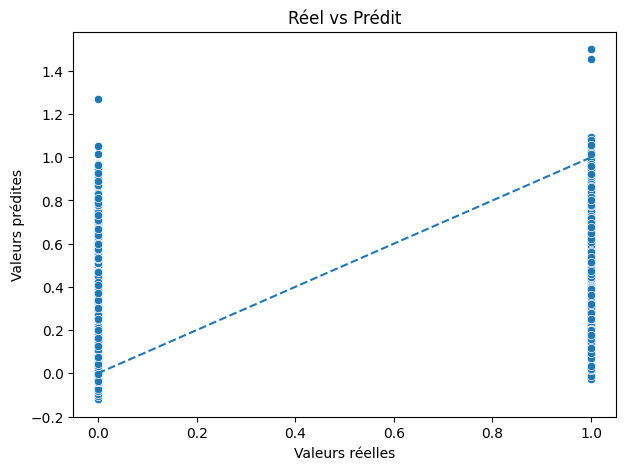

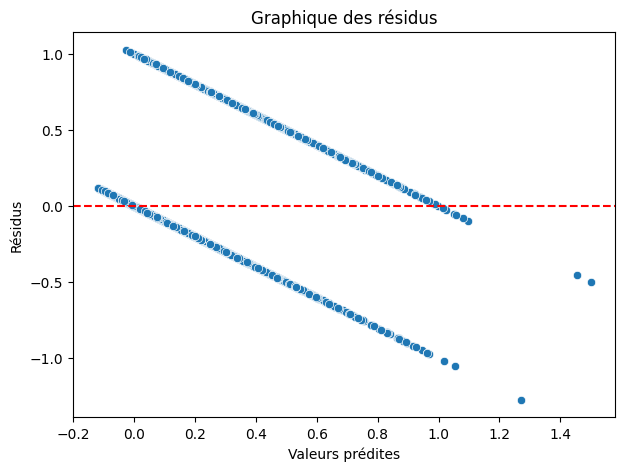

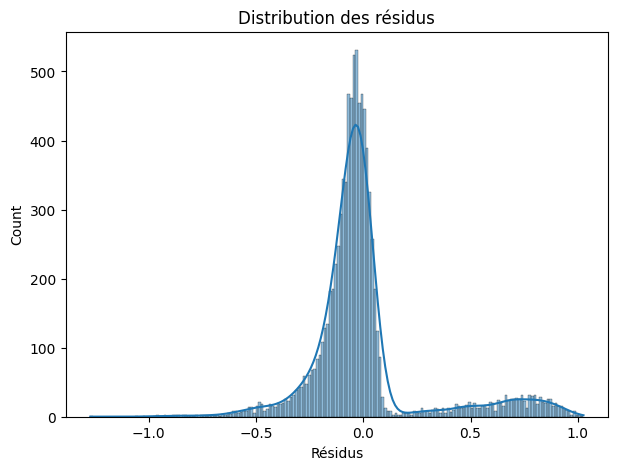

In [22]:
# ---------------------------------------------------------
# 1. Charger le dataset
# ---------------------------------------------------------
from ucimlrepo import fetch_ucirepo
import pandas as pd

bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features
y = bank_marketing.data.targets

# Transformer y en numérique
y = y.apply(lambda col: col.map({"yes": 1, "no": 0}))

# ---------------------------------------------------------
# 2. Encoder les variables catégorielles
# ---------------------------------------------------------
X = pd.get_dummies(X, drop_first=True)

# ---------------------------------------------------------
# 3. Split Train/Test
# ---------------------------------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------------------------------------
# 4. Modèle de Régression Linéaire
# ---------------------------------------------------------
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# ---------------------------------------------------------
# 5. Métriques
# ---------------------------------------------------------
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== ÉVALUATION RÉGRESSION ===")
print("MSE  :", mse)
print("RMSE :", rmse)
print("R²   :", r2)

# ---------------------------------------------------------
# 6. Graphique Réel vs Prédit
# ---------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test.values.ravel(), y=y_pred.ravel())
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Réel vs Prédit")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--')
plt.show()

# ---------------------------------------------------------
# 7. Résidus
# ---------------------------------------------------------
residuals = y_test.values.ravel() - y_pred.ravel()

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred.ravel(), y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Graphique des résidus")
plt.show()

# ---------------------------------------------------------
# 8. Distribution des résidus
# ---------------------------------------------------------
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True)
plt.title("Distribution des résidus")
plt.xlabel("Résidus")
plt.show()
